# Notebook 02: NumPy & Pandas with Apollo Mode Choice Data

**Objective:** Learn how to use NumPy and Pandas for data analysis, using the Apollo mode choice dataset as a case study. We will practice reading data, inspecting its structure, cleaning or preprocessing as needed, performing calculations like z-scoring (standardization) and aggregate share computations, and interpreting these in behavioral terms. The goal is to become comfortable with data manipulation in Python and to connect summary statistics to choice behavior insights.

## 02.1 Introduction to the Apollo Mode Choice Dataset

The dataset `apollo_modeChoiceData.csv` is a mode choice dataset included with the Apollo software. It contains 8,000 observations of travel mode choices among 4 alternatives: car, bus, air, and rail. These observations come from 500 individuals, each facing multiple choice situations (2 revealed preference trips and 14 stated preference scenarios per individual, making 16 observations each). For each observation, the dataset records:

- **Alternative attributes:** travel time and cost for each mode, plus mode-specific features like access time or service quality (for air and rail).
- **Availability indicators:** whether each mode was available (e.g., not all modes may be available for every trip).
- **Individual characteristics:** e.g., income, gender (female dummy), trip purpose (business dummy).
- **Choice outcome:** which mode was chosen (encoded as 1=car, 2=bus, 3=air, 4=rail).

Let's load the data using Pandas and take a look:

In [1]:
import pandas as pd

# Load the mode choice dataset
df = pd.read_csv("../data/raw/apollo_modeChoiceData.csv")
print("Data loaded. Number of rows:", len(df))
df.head(5)  # display the first 5 rows


Data loaded. Number of rows: 8000


,ID,RP,SP,RP_journey,SP_task,av_car,av_bus,av_air,av_rail,time_car,...,access_air,service_air,time_rail,cost_rail,access_rail,service_rail,female,business,income,choice
0,1,1,0,1.0,NaN,0,0,1,1,0,...,55,0,140,55,5,0,0,0,46705,4
1,1,1,0,2.0,NaN,0,0,1,1,0,...,45,0,170,45,20,0,0,0,46705,4
2,1,0,1,NaN,1.0,0,0,1,1,0,...,55,3,170,35,5,2,0,0,46705,4
3,1,0,1,NaN,2.0,0,0,1,1,0,...,45,1,120,75,5,3,0,0,46705,4
4,1,0,1,NaN,3.0,0,0,1,1,0,...,40,1,155,75,25,2,0,0,46705,4


In [2]:
df

,ID,RP,SP,RP_journey,SP_task,av_car,av_bus,av_air,av_rail,time_car,...,access_air,service_air,time_rail,cost_rail,access_rail,service_rail,female,business,income,choice
0,1,1,0,1.0,NaN,0,0,1,1,0,...,55,0,140,55,5,0,0,0,46705,4
1,1,1,0,2.0,NaN,0,0,1,1,0,...,45,0,170,45,20,0,0,0,46705,4
2,1,0,1,NaN,1.0,0,0,1,1,0,...,55,3,170,35,5,2,0,0,46705,4
3,1,0,1,NaN,2.0,0,0,1,1,0,...,45,1,120,75,5,3,0,0,46705,4
4,1,0,1,NaN,3.0,0,0,1,1,0,...,40,1,155,75,25,2,0,0,46705,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,500,0,1,NaN,10.0,1,1,0,1,300,...,0,0,170,35,5,3,0,1,19910,4
7996,500,0,1,NaN,11.0,1,1,0,1,275,...,0,0,130,65,15,3,0,1,19910,4
7997,500,0,1,NaN,12.0,1,1,0,1,345,...,0,0,140,75,5,2,0,1,19910,1
7998,500,0,1,NaN,13.0,1,1,0,1,250,...,0,0,130,65,10,2,0,1,19910,4


We see the first few rows of the data frame, with columns such as `ID`, `RP`, `SP_task`, `time_car`, `cost_car`, ..., `time_rail`, `cost_rail`, `female`, `income`, `choice`, etc. Each row is one choice observation. Pandas loaded this into a **DataFrame**, which is a 2D labeled data structure (table) with rows and columns.

We can use `df.info()` to get a summary of columns and data types:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            8000 non-null   int64  
 1   RP            8000 non-null   int64  
 2   SP            8000 non-null   int64  
 3   RP_journey    1000 non-null   float64
 4   SP_task       7000 non-null   float64
 5   av_car        8000 non-null   int64  
 6   av_bus        8000 non-null   int64  
 7   av_air        8000 non-null   int64  
 8   av_rail       8000 non-null   int64  
 9   time_car      8000 non-null   int64  
 10  cost_car      8000 non-null   int64  
 11  time_bus      8000 non-null   int64  
 12  cost_bus      8000 non-null   int64  
 13  access_bus    8000 non-null   int64  
 14  time_air      8000 non-null   int64  
 15  cost_air      8000 non-null   int64  
 16  access_air    8000 non-null   int64  
 17  service_air   8000 non-null   int64  
 18  time_rail     8000 non-null 

**Data Inspection**

Use Pandas to inspect basic properties:

- `df.shape` gives (rows, columns) count.

- `df.columns` lists column names.

- `df.describe()` provides descriptive statistics for numeric columns (count, mean, std, min, quartiles, max).

In [4]:
# check shape
df.shape

(8000, 26)

In [5]:
# check columns
df.columns.tolist()

['ID',
 'RP',
 'SP',
 'RP_journey',
 'SP_task',
 'av_car',
 'av_bus',
 'av_air',
 'av_rail',
 'time_car',
 'cost_car',
 'time_bus',
 'cost_bus',
 'access_bus',
 'time_air',
 'cost_air',
 'access_air',
 'service_air',
 'time_rail',
 'cost_rail',
 'access_rail',
 'service_rail',
 'female',
 'business',
 'income',
 'choice']

In [6]:
# summary statistics
df.describe()


,ID,RP,SP,RP_journey,SP_task,av_car,av_bus,av_air,av_rail,time_car,...,access_air,service_air,time_rail,cost_rail,access_rail,service_rail,female,business,income,choice
count,8000.000000,8000.00000,8000.00000,1000.00000,7000.000000,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000
mean,250.500000,0.12500,0.87500,1.50000,7.500000,0.778000,0.902000,0.752000,0.87400,242.575000,...,33.855000,1.313250,124.917500,48.098750,13.075625,1.52375,0.476000,0.330000,44748.274000,2.807625
std,144.346301,0.33074,0.33074,0.50025,4.031417,0.415617,0.297333,0.431879,0.33187,136.951068,...,20.392945,1.155548,50.258546,22.539382,8.267539,1.10853,0.499455,0.470242,17059.942873,1.265036
min,1.000000,0.00000,0.00000,1.00000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,15490.000000,1.000000
25%,125.750000,0.00000,1.00000,1.00000,4.000000,1.000000,1.000000,1.000000,1.00000,250.000000,...,35.000000,0.000000,120.000000,35.000000,5.000000,1.00000,0.000000,0.000000,30371.500000,1.000000
50%,250.500000,0.00000,1.00000,1.50000,7.500000,1.000000,1.000000,1.000000,1.00000,275.000000,...,40.000000,1.000000,140.000000,55.000000,15.000000,2.00000,0.000000,0.000000,44977.000000,3.000000
75%,375.250000,0.00000,1.00000,2.00000,11.000000,1.000000,1.000000,1.000000,1.00000,345.000000,...,50.000000,2.000000,155.000000,65.000000,20.000000,3.00000,1.000000,1.000000,59155.500000,4.000000
max,500.000000,1.00000,1.00000,2.00000,14.000000,1.000000,1.000000,1.000000,1.00000,390.000000,...,55.000000,3.000000,170.000000,75.000000,25.000000,3.00000,1.000000,1.000000,74891.000000,4.000000


The descriptive stats show, for instance:

- Travel times and costs: their mean, min, max. For example, `time_car` have a mean ~242 minutes, `cost_car` mean ~£4
- `income`: mean ~ £44,748
- `choice`: min 1, max 4 (since choices range 1-4).

In [7]:
## get standard deviation of 'time_car' column
df["time_car"].std()

np.float64(136.95106817540452)

In [8]:
# get mean of 'time_car' column
df["time_car"].mean()

np.float64(242.575)

In [9]:
# get maximum of 'time_car' column
df["time_car"].max()

np.int64(390)

In [10]:
## numpy to explore the data
import numpy as np

# Get basic statistics for travel times
print("Car travel time - mean:", np.mean(df["time_car"]), "std:", np.std(df["time_car"]))
print("Bus travel time - mean:", np.mean(df["time_bus"]), "std:", np.std(df["time_bus"]))
print("Air travel time - mean:", np.mean(df["time_air"]), "std:", np.std(df["time_air"]))
print("Rail travel time - mean:", np.mean(df["time_rail"]), "std:", np.std(df["time_rail"]))


Car travel time - mean: 242.575 std: 136.9425084661443
Bus travel time - mean: 334.005 std: 115.63113756683362
Air travel time - mean: 52.69375 std: 32.64285849826115
Rail travel time - mean: 124.9175 std: 50.255404622289134


In [11]:
# check unique values in 'choice' column
df["choice"].unique()

array([4, 3, 2, 1])

In [12]:
# count values in 'choice' column
df["choice"].value_counts()

choice
4    3501
1    2278
3    1737
2     484
Name: count, dtype: int64

In [13]:
# Calculate mode shares
df['choice'].value_counts(normalize=True)

choice
4    0.437625
1    0.284750
3    0.217125
2    0.060500
Name: proportion, dtype: float64

In [14]:
# Calculate average income
avg_income = np.mean(df['income'])
print("Average income:", avg_income)

Average income: 44748.274


In [15]:
# explore the data further using pandas
print("Correlation matrix:\n", df.corr())


Correlation matrix:
                         ID            RP            SP    RP_journey  \
ID            1.000000e+00 -2.374355e-16 -2.398668e-15 -2.559853e-18   
RP           -2.374355e-16  1.000000e+00 -1.000000e+00           NaN   
SP           -2.398668e-15 -1.000000e+00  1.000000e+00           NaN   
RP_journey   -2.559853e-18           NaN           NaN  1.000000e+00   
SP_task      -1.827074e-15           NaN           NaN           NaN   
av_car        5.051238e-03 -3.561840e-18  7.480881e-17  2.822307e-18   
av_bus        2.001697e-02 -1.342381e-17  6.618946e-17  2.344605e-18   
av_air       -5.005429e-03 -1.108502e-17 -6.427281e-17  6.627596e-19   
av_rail      -2.732877e-02  9.773279e-18  6.449490e-17  8.100950e-18   
time_car      4.706778e-03 -8.928674e-03  8.928674e-03 -1.458089e-02   
cost_car      3.996195e-03  4.273268e-03 -4.273268e-03  3.927667e-03   
time_bus      1.715317e-02 -1.814133e-03  1.814133e-03 -2.728767e-02   
cost_bus      2.108910e-02 -2.215269e-03  2

In [16]:
# Group by gender (female dummy) and calculate mean income
mean_income_by_gender = df.groupby('female')['income'].mean()
print("Mean income by gender:\n", mean_income_by_gender)

Mean income by gender:
 female
0    43865.022901
1    45720.592437
Name: income, dtype: float64


In [17]:
# Group by trip purpose (business dummy) and calculate mode shares
mode_shares_by_purpose = df.groupby('business')['choice'].value_counts(normalize=True)
print("Mode shares by trip purpose (business=0/1):\n", mode_shares_by_purpose)

Mode shares by trip purpose (business=0/1):
 business  choice
0         4         0.409328
          1         0.341791
          3         0.162313
          2         0.086567
1         4         0.495076
          3         0.328409
          1         0.168939
          2         0.007576
Name: proportion, dtype: float64


## 02.2 Data Cleaning and Preparation

For this introductory analysis, the data is already clean in structure, but a few things we might do:

- Handle availability: To avoid skewing calculations, sometimes it's useful to set unavailable alternatives' attributes to NaN (so they don't count in means). But for simplicity, we'll perhaps filter by available when needed or interpret carefully.

- Create derived variables: e.g., total travel time including access for composite modes (air/rail) if needed, or perhaps convert time to hours.

- Z-scoring (standardization): It's common to standardize continuous variables (mean 0, std 1) for model estimation or comparison. We'll demonstrate z-scoring on, say, income or travel time to show how to do it.

Let's do a quick example: Add a column for standardized income (z-score of income):

In [18]:
income_mean = df["income"].mean()
income_std = df["income"].std()
df["income_z"] = (df["income"] - income_mean) / income_std
df.head(5)

,ID,RP,SP,RP_journey,SP_task,av_car,av_bus,av_air,av_rail,time_car,...,service_air,time_rail,cost_rail,access_rail,service_rail,female,business,income,choice,income_z
0,1,1,0,1.0,NaN,0,0,1,1,0,...,0,140,55,5,0,0,0,46705,4,0.114697
1,1,1,0,2.0,NaN,0,0,1,1,0,...,0,170,45,20,0,0,0,46705,4,0.114697
2,1,0,1,NaN,1.0,0,0,1,1,0,...,3,170,35,5,2,0,0,46705,4,0.114697
3,1,0,1,NaN,2.0,0,0,1,1,0,...,1,120,75,5,3,0,0,46705,4,0.114697
4,1,0,1,NaN,3.0,0,0,1,1,0,...,1,155,75,25,2,0,0,46705,4,0.114697


This computes `income_z` where a value of 0 means the income is exactly average, +1 means one standard deviation above average, etc. For context, if mean income ~44748 and std ~ around maybe 17000, an income of 60k might have `income_z` ~ +1. We include this to show Pandas operations on columns (which operate elementwise, no loop needed).

Similarly, we could standardize travel times or costs if needed:

In [19]:
time_car_mean = df["time_car"].mean()
time_car_std = df["time_car"].std()
df["time_car_z"] = (df["time_car"] - time_car_mean) / time_car_std
df[["time_car", "time_car_z"]].head(5)

,time_car,time_car_z
0,0,-1.771253
1,0,-1.771253
2,0,-1.771253
3,0,-1.771253
4,0,-1.771253


and so on for each mode's time or cost. However, remember that zeros for unavailable modes could skew the mean (since those zeros are not actual travel times but placeholders). For demonstration, let's focus on some meaningful analysis rather than standardizing everything blindly.

**Computing Mode Shares**

A fundamental analysis in mode choice is to look at the market share of each alternative (how often each mode is chosen in the dataset). We can compute this easily with Pandas:

In [20]:
mode_share=(100*df["choice"].value_counts(normalize=True)).round(2)
mode_share

choice
4    43.76
1    28.48
3    21.71
2     6.05
Name: proportion, dtype: float64

<Axes: title={'center': 'Mode Shares (%)'}, xlabel='Mode', ylabel='Percentage'>

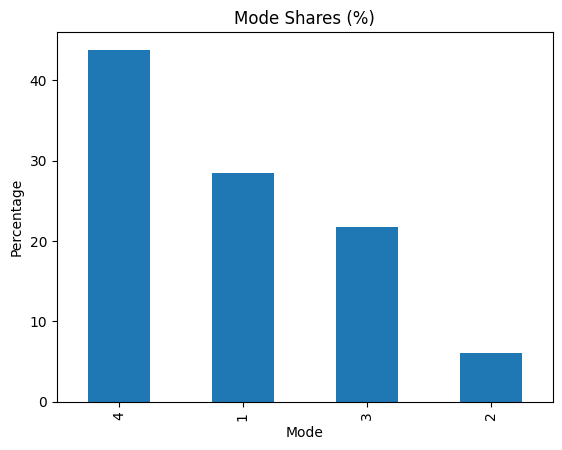

In [21]:
#mode_share.index = ["Rail", "Car", "Air", "Bus"]
mode_share.plot(kind="bar", title="Mode Shares (%)", ylabel="Percentage", xlabel="Mode")

From this, we can interpret: e.g., Rail was chosen in about 44% of observations, Car in 28%, Air ~22%, Bus ~6%. This suggests, in the survey scenarios, Rail is the most preferred mode on average (if available), but the others also capture significant shares. These shares combine both RP and SP data; one could separate them (using `df[df["RP"]==1]` vs SP) to see differences in real vs stated contexts, but we won't digress that far here.

In [22]:
#### Stop here ###

**Inspecting and Interpreting Variables**

Let's do a bit of exploration to connect data with behavior:

- What is the average travel time and cost by mode (for the chosen mode vs alternatives)?

- How do individual characteristics like income or gender relate to choices?

We can use Pandas grouping for this. For example, to find the average income of people who chose each mode:

In [23]:
avg_income_by_choice = df.groupby("choice")["income"].mean()
print("Average income by chosen mode:\n", avg_income_by_choice)

Average income by chosen mode:
 choice
1    43832.023266
2    36835.694215
3    47212.312608
4    45215.818338
Name: income, dtype: float64


If we see that air choosers have higher income on average than bus, rail, or car choosers, that aligns with expectations: higher-income travelers may prefer faster or more premium modes. Lower-income travelers might be more cost-sensitive and opt for bus. This is a hypothesis we can start to see in the data.

We can also examine the effect of the female dummy (gender) on mode choice:

In [24]:
share_female = df.groupby("choice")["female"].mean() * 100  # % of observations that are female, by mode chosen
print("Percentage of female travellers by chosen mode:\n", share_female.round(1))


Percentage of female travellers by chosen mode:
 choice
1    47.1
2    46.5
3    48.1
4    47.8
Name: female, dtype: float64


We see that among bus choices 46% are female but among air choices 48% are female, it might suggest some gender preference or differences in trip contexts (e.g., maybe females in this sample were a bit more likely to choose air). However, be cautious: this could also reflect correlation with other factors (like trip purpose or income).

Another useful analysis: **trip purpose** (business or not) effect. The dataset has a `business` dummy (1 for business trips). Business travelers might have different preferences (often value time more than cost, possibly choosing faster modes). We can check mode share split by business vs non-business:

In [25]:
business_share = df.groupby("business")["choice"].value_counts(normalize=True).sort_index() * 100
print(business_share.round(1))


business  choice
0         1         34.2
          2          8.7
          3         16.2
          4         40.9
1         1         16.9
          2          0.8
          3         32.8
          4         49.5
Name: proportion, dtype: float64


This gives two blocks (business=0 and business=1) each with the percentage choosing each mode. We see, for example, that among business trips, air and rail shares are higher (time is critical), whereas among non-business, cost-sensitive modes (bus and car) have higher share.

Such insights connect data to behavioral interpretation:

- Higher mode share for air in business trips would indicate business travelers often fly to save time (despite cost).

- Higher bus usage among non-business could imply leisure or personal travelers trade time for money savings.

**Z-Score Example: Standardizing Travel Time**

We mentioned standardization. Let's demonstrate z-scoring a variable fully and explain why it's done. We did income above; let's do travel time for one mode for practice:

In [26]:
df["time_car_z"] = (df["time_car"] - df["time_car"].mean()) / df["time_car"].std()
print("Car travel time - mean:", df["time_car"].mean(), "std:", df["time_car"].std())
print(df[["time_car", "time_car_z"]].head(3))


Car travel time - mean: 242.575 std: 136.95106817540452
   time_car  time_car_z
0         0   -1.771253
1         0   -1.771253
2         0   -1.771253


This outputs the mean and std (mean ~242 min, std maybe ~137 min). And first rows show `time_car` alongside a `time_car_z`. Standardizing is often done before modeling if variables have very different scales, to make model convergence easier or to compare effect sizes. For example, a coefficient on a z-scored variable indicates impact per one std dev change.

In a discrete choice context, you might standardize variables like income or travel time if you were focusing on relative importance. However, one must be careful interpreting standardized coefficients back to real-world meaning. In our workshop, we focus on understanding raw units too (e.g., Value of Time in £/hour which comes from raw coefficients).

**Cleaning: Handling Missing or Invalid Data**

For completeness: if this were a raw survey, we might have missing values or data entry errors. Pandas offers `df.isnull().sum()` to count missing values per column, and methods like `dropna()` or `fillna()` to handle them. In this provided dataset, we don't expect missing values except those intentionally marked (like 0 for unavailable). We should treat those carefully as described (perhaps filter out or ignore when calculating means for a specific mode attribute).

For example, if we want the actual average travel time for trips where car was available, we should exclude the rows where `av_car=0` (because then `time_car=0` is just a placeholder). We can do:

In [27]:
car_time_available = df.loc[df["av_car"] == 1, "time_car"]
print("Average car travel time (when available):", car_time_available.mean())


Average car travel time (when available): 311.793059125964


This gives a more meaningful figure. Similarly for other modes.

**Summary of Findings (so far)**

Using Pandas and NumPy, we have:

- Loaded and inspected a choice dataset (size, types, basic stats).

- Computed new columns (e.g., standardized income).

- Calculated mode shares and basic group statistics.

- Begun interpreting patterns (e.g., mode shares, income effect, gender/purpose breakdown).

These data exploration skills are crucial before modeling: they help you understand the context and spot anything unusual (like if a mode is rarely chosen, or if a variable has implausible values).

Up next, in **Notebook 03**, we will take this same mode choice data and learn how to visualize various aspects of it using Python plotting libraries. Visualization will provide another perspective on the data, allowing us to see distributions and relationships that numbers alone might not fully reveal.